# An example of Option pricing



## Content

- Black-Scholes-Merton model
    - Model assumptions
    - Formulas and graphs


- Monte Carlo simulations
    - One-step simulation
    - Multi-step simulation
    
   
- Binomial model

## Black-Scholes-Merton model
### Model assumptions
The Black–Scholes model assumes that the market consists of at least one risky asset, usually called the stock, and one riskless asset, usually called the money market, cash, or bond.

Market assumptions:

* **No arbitrage** (no way to make a riskless profit).
* It is possible to buy and sell any amount, even fractional, of the stock/bond.
* **Frictionless market**. The above transactions do not incur any fees or costs.


Assets ( B, S ):

* Risk-free rate: **r = const**.
* S is a **geometric Brownian motion** with constant drift and volatility (if they are time-varying, we can deduce a suitably modified Black–Scholes formula quite simply, as long as the volatility is not random).


In the classic version there are no dividends on the underlying asset. But the model is easily generalized to the case of an asset with dividends. This is necessary, for example, for FX options.


### BS equation

$$ \frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + rS\frac{\partial C}{\partial S} - rC = 0 $$
PDE, not SDE (!) 


### BS formula  ( $q \ne 0$)
Black-Scholes formula for European call-option:  

$$ C(S, K, \tau, r, q, \sigma) = N( d_+ ) S e^{ -q \tau} - N( d_- ) K e^{ -r \tau } $$  

for put:

$$ P(S, K, \tau, r, q, \sigma) = K e^{-r \tau } N( -d_{-} ) - S_0 e^{ - q \tau } N( -d_{+} ) $$

where: 
$$ \tau = T - t $$
.

$$  d_{+} = \frac{ \log{ \frac{S}{K} } + (r-q + \frac{ \sigma^{2} }{2} \tau ) }{ \sigma \sqrt{ \tau }  } = d_{1}  $$    

and

$$  d_{-} = d_{+} - \sigma  \sqrt{ \tau } = \frac{ \log{ \frac{S}{K} } + (r-q - \frac{ \sigma^{2} }{2} \tau ) }{ \sigma \sqrt{ \tau } } = d_{2} $$  

$N(z) = \Phi(z) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{z} e^{-\frac{ x^{2}}{2} } dx$ -- normal CDF. 

Normal PDF: $N'(z) = \phi(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{ x^{2}}{2}}$.



### Formulas and graphs

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import math as m
import pandas as pd

from time import time

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
def N(x):
    return stats.norm.cdf(x, 0.0, 1.0)


def NPrime(x):
    return stats.norm.pdf(x, 0.0, 1.0)


def bsm_d1(S, K, T, r, q, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * m.sqrt(T))


def bsm_d2(S, K, T, r, q, sigma):
    return (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * m.sqrt(T))


def bsm_pv(isCall, S, K, T, r, q, sigma):
    d1 = bsm_d1(S, K, T, r, q, sigma)
    d2 = bsm_d2(S, K, T, r, q, sigma)
    if isCall:
        return S * N(d1) * m.exp(-q * T) - K * m.exp(-r * T) * N(d2)
    else:
        return K * N(-d2) * m.exp(-r * T)  - S * m.exp(-q * T) * N(-d1)

    
def call_payoff(K, S):
    return np.maximum(S-K, 0)

#### Task: calculate option price for all values of x and given parameters, then make a plot with the title

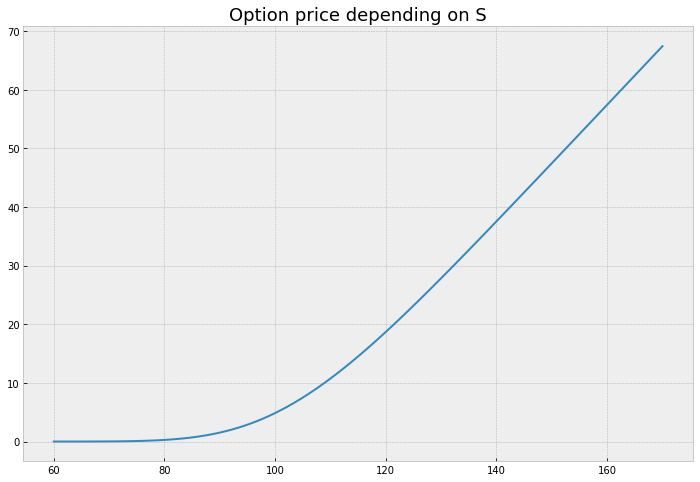

In [28]:
K = 110
r = 0.07
sigma = 0.15
T = 1

x = np.linspace(K-50, K+60, num=100)
y = ...

...

plt.show()

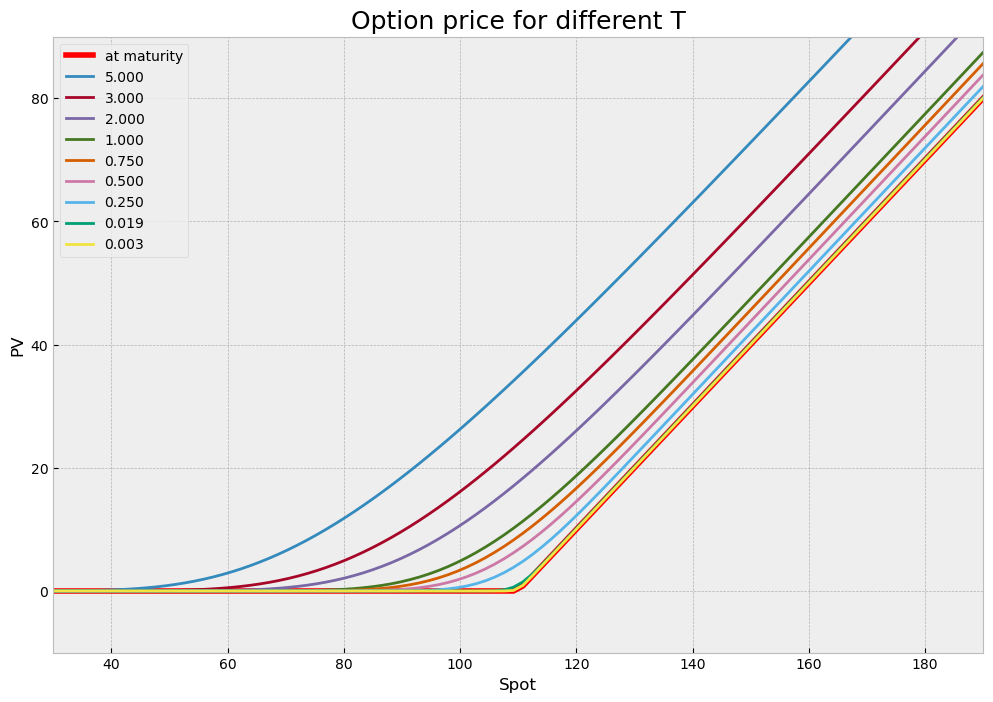

In [5]:
Ts = [5, 3, 2, 1, 0.75, 0.5, 0.25, 1./52., 1./365.]

x = np.linspace(30, K+80, num=100)

f, ax = plt.subplots(figsize=(12,8))
ax.grid(True)
plt.plot(x, call_payoff(K, x), 'r', linewidth=4)
for T in Ts:
    ax.plot(x, bsm_pv(True, S=x, K=K, T=T, r=r, q=0, sigma=sigma ))

plt.legend(['at maturity'] + ['{:.3f}'.format(t) for t in Ts], loc = "upper left")
plt.title('Option price for different T', fontsize=18)

axes = plt.gca()
axes.set_xlim([min(x),max(x)]); axes.set_ylim([-10,90])
axes.set_xlabel('Spot')
axes.set_ylabel('PV')

plt.show()

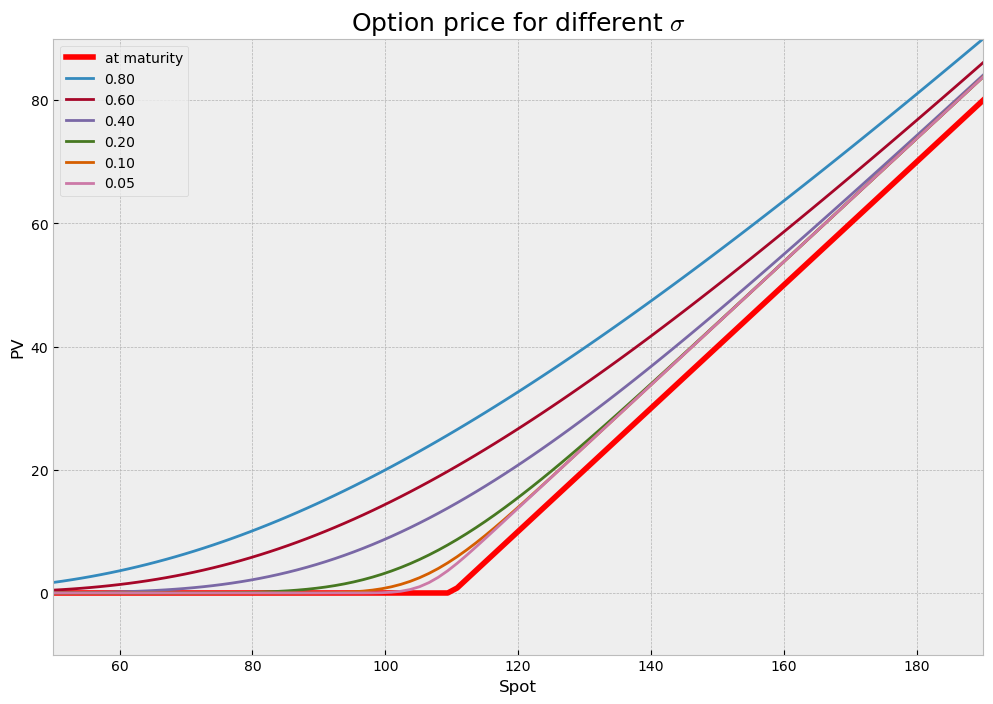

In [6]:
T = 0.5
sigmas = [0.8, 0.6, 0.4, 0.2, 0.1, 0.05]

x = np.linspace(50, K+80, num=100)
f, ax = plt.subplots(figsize=(12,8))
ax.grid(True)
plt.plot(x, call_payoff(K, x), 'r', linewidth=4)

for sigma in sigmas:
    ax.plot(x, bsm_pv(True, S=x, K=K, T=T, r=r, q=0, sigma=sigma ))
plt.legend(['at maturity'] + ['{:.2f}'.format(s) for s in sigmas], loc = "upper left")
plt.title('Option price for different $\sigma$', fontsize=18)

axes = plt.gca()
axes.set_xlim([min(x),max(x)]); axes.set_ylim([-10,90])
axes.set_xlabel('Spot'); axes.set_ylabel('PV')

plt.show()

## Monte Carlo simulations

$ C_0 = E\left[ e^{-rT} max(0, S_T - K) \right] $

$S(t+\Delta t) = S(t) \exp(r \Delta t - \frac{1}{2} \sigma^2 \Delta t + \sigma W_{\Delta t} )$

In [7]:
S0 = 80.; K = 85.; T = 1.0; r = 0.05; q = 0.0;
sigma = 0.2

ref_pv = bsm_pv(True, S=S0, K=K, T=T, r=r, q=0, sigma=sigma)

###  One-step simulation

In [9]:
def mc_euro_call_pv_no_paths(S0, K, T, r, sigma, I):
    # Simulating I values
    z = np.random.standard_normal(I)
    S = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * m.sqrt(T) * z)

    # payoff
    P = np.maximum(S - K, 0)
    # PV as expected discounted payoff
    C = np.sum(m.exp(-r * T) * P) / I
    return C, S

In [10]:
# Parameters
M = 360; I = 50000

In [11]:
np.random.seed(12345)
t0 = time()
C, S = mc_euro_call_pv_no_paths(S0, K, T, r, sigma, I)
calcTime = time() - t0

print( "PV: %.5f, abs diff: %.5f, rel diff:  %.5f" % (C, ref_pv - C, (ref_pv - C)/C) )
print( "Calculation time   %.5f" % calcTime )

PV: 5.99660, abs diff: -0.00836, rel diff:  -0.00139
Calculation time   0.00395


#### Task: calculate analytical price for Put option using bsm_pv()

#### Task: write a new function mc_euro_put_pv_no_paths() by changing a code in mc_euro_call_pv_no_paths(). Then calculate an approximate value and compare it to the analytical price

### Multi-step simulation

In [12]:
def mc_euro_call_pv_with_paths0(S0, K, T, r, sigma, M, I):
    # Simulating I paths with M time steps
    S = np.zeros((M + 1, I))
    S[0] = S0
    dt = float(T) / M
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * m.sqrt(dt) * z)

    # PV is extected discounted payoff
    C = np.sum(m.exp(-r * T) * np.maximum(S[-1] - K, 0)) / I
    return C, S

In [13]:
np.random.seed(12345)
t0 = time()
C, SPaths = mc_euro_call_pv_with_paths0(S0, K, T, r, sigma, M, I)
calcTime = time() - t0

print( "PV: %.5f, abs diff: %.5f, rel diff:  %.5f" % (C, ref_pv - C, (ref_pv - C)/C) )
print("Calculation time   %.5f" % calcTime)

PV: 5.95967, abs diff: 0.02858, rel diff:  0.00480
Calculation time   0.73248


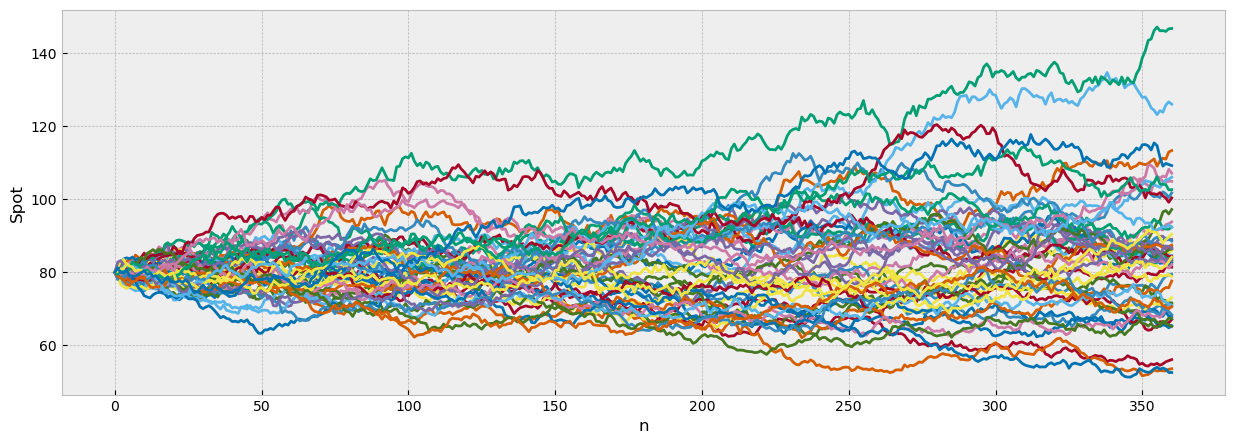

In [14]:
plt.figure(figsize=(15,5))
plt.plot(SPaths[:, :50])
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')

plt.show()